# Notebook showcasing essential Isolation Forest techniques for anomaly detection.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

**data transformation:**

In [27]:
df = pd.read_csv(
    "industrial_sensors.csv",
    sep=";",
    decimal=","
)
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [28]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df = df.dropna(subset=['timestamp'])
df.set_index('timestamp', inplace=True)

,temperature,vibration,pressure,flow_rate,efficiency
timestamp,,,,,
2024-01-01 20:52:00,7.794220e+15,4.355410e+15,3.285960e+15,3.917740e+15,9.109980e+14
2024-01-04 06:04:00,7.718750e+15,1.461560e+16,2.152910e+16,1.128360e+16,6.751600e+15
2024-01-02 04:51:00,7.211330e+15,3.267870e+16,2.944560e+16,2.526050e+15,9.439010e+15
2024-01-04 07:02:00,6.745000e+15,1.528600e+15,1.974760e+16,2.133060e+16,8.208230e+15
2024-01-04 03:21:00,9.143880e+14,1.623120e+15,3.118080e+16,3.184410e+15,8.322740e+15


In [29]:
cols = ['temperature','vibration','pressure','flow_rate','efficiency']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [30]:
df[cols] = df[cols].fillna(df[cols].median())

In [67]:
df = df[~df.index.duplicated(keep='first')]

**Standartization:**

In [64]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[cols])

**Anomaly Detection**

In [65]:
model = IsolationForest(
    n_estimators=100,
    contamination=0.05,
    random_state=42
)
df['anomaly'] = model.fit_predict(X_scaled)

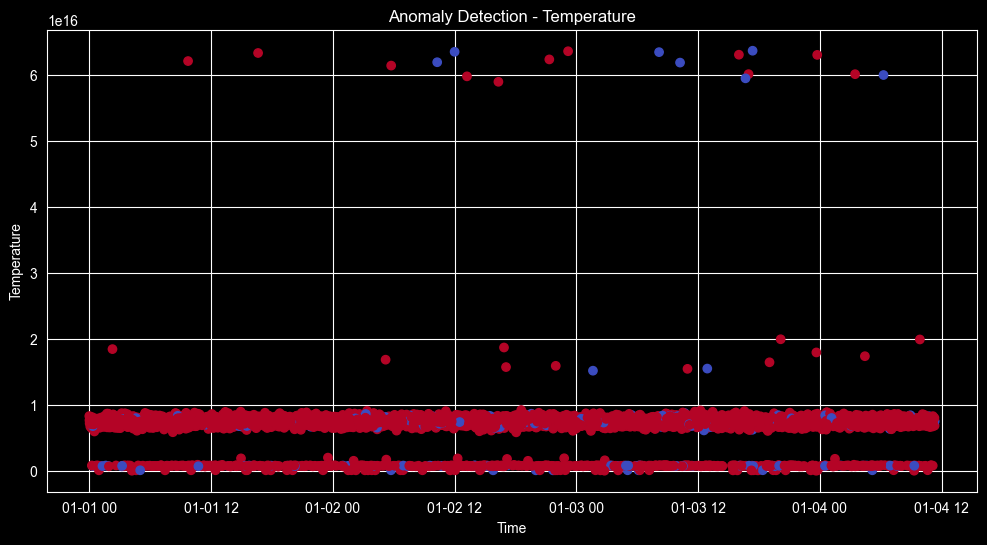

In [66]:
plt.figure(figsize=(12,6))
plt.scatter(df.index, df['temperature'],
            c=df['anomaly'], cmap='coolwarm', marker='o')
plt.title("Anomaly Detection - Temperature")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.show()


**Export data:**

In [63]:
df.to_csv("industrial_sensors_anomalies_processed.csv", sep=";")